# Dublin Bikes Machine Learning Analysis

In [1]:
#import necessary libraries and files 
import pandas as pd
import numpy as np
import warnings
import time
import datetime as dt
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import folium
import sklearn
import seaborn as sns
import urllib
import os
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans


%matplotlib inline

## Downloading data directly  from URL avoids cross-platform and end-user errors 
if not os.path.exists("data"):
    os.makedirs("data")



In [2]:

### Defines a list of tuples with ordered pairs of filenames and retrieval urls for urllib requests later.
### The os library checks if the quarterly csv file is already in place and if not it asks the urllib library to retrieve
### the csv at that url and name it according to item[0]
### Date range can easily be restricted by commenting out tuples.
    
dataframes = [
#      (
#         "data/2018_Q3.csv",
#         " https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/9496fac5-e4d7-4ae9-a49a-217c7c4e83d9/download/dublinbikes_20180701_20181001.csv",
#     ),
#      (
#         "data/2018_Q4.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/67ea095f-67ad-47f5-b8f7-044743043848/download/dublinbikes_20181001_20190101.csv",
#     ),
    
    
    (
        "data/2019_Q1.csv",
        "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/538165d7-535e-4e1d-909a-1c1bfae901c5/download/dublinbikes_20190101_20190401.csv",
    ),
    (
        "data/2019_Q2.csv",
        "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/76fdda3d-d8be-441b-92dd-0ee36d9c5316/download/dublinbikes_20190401_20190701.csv",
    ),
    (
        "data/2019_Q3.csv",
        "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/305d39ac-b6a0-4216-a535-0ae2ddf59819/download/dublinbikes_20190701_20191001.csv",
    ),
    (
        "data/2019_Q4.csv",
        "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/5d23332e-4f49-4c41-b6a0-bffb77b33d64/download/dublinbikes_20191001_20200101.csv",
    )
    
    #,
#             (
#         "data/2020_Q1.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/aab12e7d-547f-463a-86b1-e22002884587/download/dublinbikes_20200101_20200401.csv",
#     ),
#                 (
#         "data/2020_Q2.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/8ddaeac6-4caf-4289-9835-cf588d0b69e5/download/dublinbikes_20200401_20200701.csv",
#     ),
#                     (
#         "data/2020_Q3.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/99a35442-6878-4c2d-8dff-ec43e91d21d7/download/dublinbikes_20200701_20201001.csv",
#     ),
#                         (
#         "data/2020_Q4.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/5328239f-bcc6-483d-9c17-87166efc3a1a/download/dublinbikes_20201001_20210101.csv",
#     ),
    
# Scope of this research is post COVID lockdown and restrictions
    #                    (
#         "data/2021_Q1.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/7987ddc8-674a-4368-b344-560804771b98/download/dublinbikes_20210101_20210401.csv",
#     ),
#                         (
#         "data/2021_Q2.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/1c18f219-3885-403e-aa55-4d4c78ee0204/download/dublinbikes_20210401_20210701.csv",
#     ),
#                             (
#         "data/2021_Q3.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/91ccfcb7-0c5b-41e4-be1b-e5d35c609638/download/dublinbikes_20210701_20211001.csv",
#     ),
#                             (
#         "data/2021_Q4.csv",
#         "https://data.smartdublin.ie/dataset/33ec9fe2-4957-4e9a-ab55-c5e917c7a9ab/resource/5bc73751-4280-4423-b64d-18f4cc17986d/download/dublinbikes_20211001_20220101.csv",
#     ),
]

# 
for item in dataframes:
    if os.path.exists(item[0]):
        continue
    print(f"Downloading {item[0]} from {item[1]}")
    urllib.request.urlretrieve(item[1], item[0])
    
data = "data/01_Loaded_Bikes.csv"
data = pd.concat([pd.read_csv(item[0]) for item in dataframes])   

if not os.path.exists("data/Bikes2019.csv"):
   data.to_csv("data/Bikes2019.csv", index=False)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10741877 entries, 0 to 2501008
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   STATION ID             int64  
 1   TIME                   object 
 2   LAST UPDATED           object 
 3   NAME                   object 
 4   BIKE STANDS            int64  
 5   AVAILABLE BIKE STANDS  int64  
 6   AVAILABLE BIKES        int64  
 7   STATUS                 object 
 8   ADDRESS                object 
 9   LATITUDE               float64
 10  LONGITUDE              float64
dtypes: float64(2), int64(4), object(5)
memory usage: 983.4+ MB


In [4]:
#Cleaning
data = data[data['STATUS'] == 'Open']
data = data[(data['LAST UPDATED'] >= '2019-07-01') & (data['LAST UPDATED'] < '2020-04-01')]
data = data[(data['LAST UPDATED'] < '2019-12-01') | (data['LAST UPDATED'] >= '2020-02-01')]

#remove rows where no update actually occurs
data = data.drop(['TIME'], axis = 1)
data.drop_duplicates(keep= 'first',inplace=True)


#get date and time columns
data['DATETIME'] = [dt.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in data["LAST UPDATED"]]
data['LAST UPDATED'] = [dt.datetime.time(d) for d in data['DATETIME']] 
data['DATE'] = [dt.datetime.date(d) for d in data['DATETIME']] 
data['date_for_merge'] = data['DATETIME'].dt.round('H')

#create important features
data['OCCUPANCY_PCT'] =  data['AVAILABLE BIKES'] / data['BIKE STANDS']
data['FULL'] = np.where(data['OCCUPANCY_PCT'] == 0, 1,0 )
data['EMPTY'] = np.where(data['OCCUPANCY_PCT'] == 1, 1,0 )

### create time aggregates needed for clustering
# weekday/saturday/sunday
data['DAY_NUMBER'] = data.DATETIME.dt.dayofweek
data['DAY_TYPE'] = np.where(data['DAY_NUMBER'] <= 4, 'Weekday', (np.where(data['DAY_NUMBER'] == 5, 'Saturday', 'Sunday')))

def bin_time(x):
    if x.time() < dt.time(6):
        return "Overnight "
    elif x.time() < dt.time(11):
        return "6AM-10AM "
    elif x.time() < dt.time(16):
        return "11AM-3PM "
    elif x.time() < dt.time(20):
        return "4PM-7PM "
    elif x.time() <= dt.time(23):
        return "8PM-11PM "
    else:
        return "Overnight "


data["TIME_TYPE"] = data['DATETIME'].apply(bin_time)
data['HOUR'] = data['DATETIME'].dt.hour
data['MONTH'] = data['DATETIME'].dt.month
data['CLUSTER_GROUP'] = data['TIME_TYPE'] + data['DAY_TYPE']

data.sample(5)



,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,date_for_merge,OCCUPANCY_PCT,FULL,EMPTY,DAY_NUMBER,DAY_TYPE,TIME_TYPE,HOUR,MONTH,CLUSTER_GROUP
2309736,12,07:50:00,ECCLES STREET,20,20,0,Open,Eccles Street,53.359245,-6.269779,...,2019-09-11 08:00:00,0.000,1,0,2,Weekday,6AM-10AM,7,9,6AM-10AM Weekday
562627,71,13:32:12,KEVIN STREET,40,37,3,Open,Kevin Street,53.337757,-6.267699,...,2019-10-18 14:00:00,0.075,0,0,4,Weekday,11AM-3PM,13,10,11AM-3PM Weekday
1291005,27,16:29:11,MOLESWORTH STREET,20,9,11,Open,Molesworth Street,53.341290,-6.258117,...,2019-08-10 16:00:00,0.550,0,0,5,Saturday,4PM-7PM,16,8,4PM-7PM Saturday
464019,61,04:12:57,HARDWICKE PLACE,25,19,6,Open,Hardwicke Place,53.357044,-6.263232,...,2019-10-15 04:00:00,0.240,0,0,1,Weekday,Overnight,4,10,Overnight Weekday
712860,36,04:56:50,ST. STEPHEN'S GREEN EAST,40,37,3,Open,St. Stephen's Green East,53.337826,-6.256035,...,2019-10-23 05:00:00,0.075,0,0,2,Weekday,Overnight,4,10,Overnight Weekday


In [5]:
### Prepare Weather Data

weather = pd.read_csv('hly175.csv')
weather['date'] = [dt.datetime.strptime(d, "%m/%d/%Y %H:%M") for d in weather['date'] ]
weather['date_for_merge'] = weather['date'].dt.round('H')
weather = weather[(weather['date'] >= '2019-04-01') & (weather['date'] < '2020-04-02')]
weather = weather[['date_for_merge', 'rain', 'temp', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl']]
weather['rain'] = weather['rain'].astype(float)
weather['temp'] = weather['temp'].astype(float)

#add binary variables to note wet/dry weather and hot or not days (temperature)
weather['dry'] = np.where(weather['rain'] > 0.0, 1, 0)
weather['warm'] = np.where(weather['temp'] > 18.0, 1, 0)
weather.sample(5)


,date_for_merge,rain,temp,wetb,dewpt,vappr,rhum,msl,dry,warm
113601,2019-09-02 10:00:00,0.0,15.9,13.4,11.4,13.5,74,1020.6,0,0
115979,2019-12-10 12:00:00,0.1,13.6,12.5,11.5,13.6,87,991.0,1,0
114105,2019-09-23 10:00:00,0.0,15.0,13.5,12.2,14.2,83,1003.5,0,0
113733,2019-09-07 22:00:00,0.0,9.3,9.1,8.8,11.3,96,1028.5,0,0
115321,2019-11-13 02:00:00,0.0,2.6,1.9,0.9,6.5,88,1004.2,0,0


In [10]:
#merge weather with bikes data
merged_data = pd.merge(data, weather, on = 'date_for_merge', how = 'left')

# identify bike arrivals and bike departures
merged_data['BIKE_ARR_DEP'] = merged_data.groupby('STATION ID')['AVAILABLE BIKE STANDS'].diff(-1)
merged_data['BIKE_ARR'] = np.where(merged_data['BIKE_ARR_DEP'] > 0, merged_data['BIKE_ARR_DEP'], 0)
merged_data['BIKE_DEP'] = np.where(merged_data['BIKE_ARR_DEP'] < 0, merged_data['BIKE_ARR_DEP'], 0)
merged_data['ACTIVITY_TYPE'] = np.where(abs(merged_data['BIKE_ARR_DEP']) >= 10, "REBALANCING", "RENTAL")
merged_data['IMBALANCED'] = np.where(merged_data['OCCUPANCY_PCT'] < .1, 1, 
                                   np.where(merged_data['OCCUPANCY_PCT'] > .9, 1,0 ))

# Identify days with rebalancing
merged_data['REBALANCING'] = np.where(merged_data['ACTIVITY_TYPE'] == 'REBALANCING', 1,0)
merged_data['JOIN_ON'] = merged_data['STATION ID'].apply(str)  + (merged_data['DATE']).apply(str) 
join_table= merged_data.groupby(['JOIN_ON'])['REBALANCING'].sum()
merged_data = merged_data.drop(['REBALANCING'], axis = 1)
join_table = join_table.to_frame()
join_table =join_table.reset_index()
merged_data = pd.merge(merged_data, join_table, on = 'JOIN_ON', how = 'left')
merged_data = merged_data.drop(['JOIN_ON'], axis = 1)

merged_data.sample(5)

,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE,...,rhum,msl,dry,warm,BIKE_ARR_DEP,BIKE_ARR,BIKE_DEP,ACTIVITY_TYPE,IMBALANCED,REBALANCING
2882071,48,21:22:14,EXCISE WALK,40,4,36,Open,Excise Walk,53.347778,-6.244239,...,97,992.5,1,0,0.0,0.0,0.0,RENTAL,0,0
877276,10,23:52:46,DAME STREET,16,15,1,Open,Dame Street,53.344006,-6.266802,...,90,1012.1,1,0,0.0,0.0,0.0,RENTAL,1,0
937154,111,16:16:26,MOUNTJOY SQUARE EAST,40,36,4,Open,Mountjoy Square East,53.356716,-6.256359,...,61,1013.3,0,1,1.0,1.0,0.0,RENTAL,0,0
1972911,83,08:24:30,EMMET ROAD,40,22,18,Open,Emmet Road,53.340714,-6.308191,...,94,1012.9,0,0,0.0,0.0,0.0,RENTAL,0,0
1986352,45,01:03:33,DEVERELL PLACE,30,0,30,Open,Deverell Place,53.351463,-6.255265,...,90,1011.7,1,0,0.0,0.0,0.0,RENTAL,1,0


### Time Clusters

In [11]:
#group data into clusters
clustering_df = merged_data[['STATION ID', 'NAME', 'LATITUDE', 'LONGITUDE', 'DAY_TYPE', 'TIME_TYPE', 'OCCUPANCY_PCT','CLUSTER_GROUP']]
clustering_df = clustering_df.groupby(['STATION ID', 'NAME', 'LATITUDE', 'LONGITUDE', 'CLUSTER_GROUP'],as_index=False)['OCCUPANCY_PCT'].mean()
clustering_df  = clustering_df.set_index('STATION ID')

#pivot dataframe for clustering
clustering_df = clustering_df.pivot_table(index= ['NAME', 'STATION ID','LATITUDE', 'LONGITUDE'] , columns=['CLUSTER_GROUP'], values='OCCUPANCY_PCT')
clustering_df  = clustering_df.reset_index()
clustering_df  = clustering_df .set_index('NAME')
clustering_df = clustering_df.dropna()

clustering_df.sample(5)

CLUSTER_GROUP,STATION ID,LATITUDE,LONGITUDE,11AM-3PM Saturday,11AM-3PM Sunday,11AM-3PM Weekday,4PM-7PM Saturday,4PM-7PM Sunday,4PM-7PM Weekday,6AM-10AM Saturday,6AM-10AM Sunday,6AM-10AM Weekday,8PM-11PM Saturday,8PM-11PM Sunday,8PM-11PM Weekday,Overnight Saturday,Overnight Sunday,Overnight Weekday
NAME,,,,,,,,,,,,,,,,,,
BARROW STREET,70,53.341656,-6.236198,0.457221,0.129602,0.703599,0.091699,0.502551,0.163900,0.593277,0.249084,0.730308,0.119338,0.753040,0.218540,0.287356,0.247592,0.315751
GRANGEGORMAN LOWER (SOUTH),103,53.354664,-6.278681,0.159064,0.142550,0.085528,0.166948,0.108366,0.059341,0.150329,0.172075,0.120158,0.161409,0.120472,0.118483,0.135511,0.171578,0.132807
PRINCES STREET / O'CONNELL STREET,33,53.349014,-6.260311,0.899466,0.907180,0.587238,0.759993,0.714499,0.811844,0.718605,0.761853,0.428349,0.646748,0.331403,0.427845,0.485989,0.438795,0.171810
ST JAMES HOSPITAL (LUAS),80,53.341358,-6.292951,0.287679,0.192190,0.209875,0.269345,0.182252,0.340084,0.454336,0.223757,0.206216,0.228947,0.221101,0.429563,0.473171,0.246258,0.455881
YORK STREET EAST,52,53.338757,-6.262003,0.808280,0.883516,0.651622,0.720165,0.797407,0.287385,0.514848,0.768647,0.606140,0.662723,0.598580,0.111472,0.228999,0.604562,0.151262


### K-Means Clustering Analysis

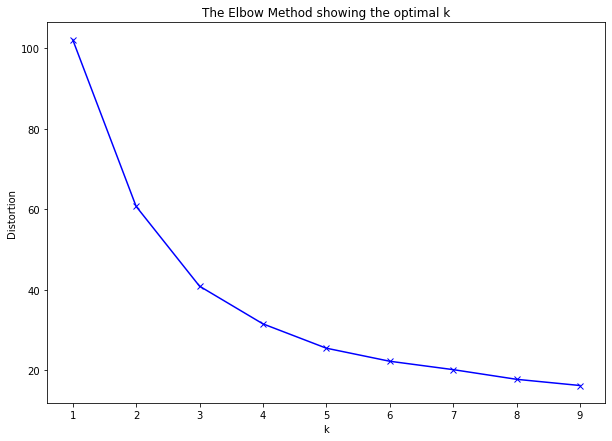

In [12]:
distortions = []
K = range(1,10)
X = np.array(clustering_df.drop(['STATION ID', 'LATITUDE', 'LONGITUDE'], 1).astype(float))
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(10,7))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
#clustering algo
X = np.array(clustering_df.drop(['STATION ID', 'LATITUDE', 'LONGITUDE'], 1).astype(float))
KM = KMeans(n_clusters=5) 
KM.fit(X)
clusters = KM.predict(X)

locations = clustering_df
locations['Cluster'] = clusters
locations = locations.reset_index()

locations.shape

(111, 20)

In [24]:

locations.sample(25)

CLUSTER_GROUP,NAME,STATION ID,LATITUDE,LONGITUDE,11AM-3PM Saturday,11AM-3PM Sunday,11AM-3PM Weekday,4PM-7PM Saturday,4PM-7PM Sunday,4PM-7PM Weekday,6AM-10AM Saturday,6AM-10AM Sunday,6AM-10AM Weekday,8PM-11PM Saturday,8PM-11PM Sunday,8PM-11PM Weekday,Overnight Saturday,Overnight Sunday,Overnight Weekday,Cluster
59,KEVIN STREET,71,53.337757,-6.267699,0.304642,0.410472,0.125568,0.341096,0.552481,0.119685,0.237868,0.436577,0.165645,0.466986,0.625000,0.157836,0.231330,0.479958,0.206112,4
83,PARNELL SQUARE NORTH,30,53.353462,-6.265305,0.173251,0.182215,0.140112,0.226194,0.189375,0.085246,0.150416,0.158905,0.110741,0.175117,0.175835,0.123553,0.150567,0.158862,0.153794,4
94,SIR PATRICK DUN'S,58,53.339218,-6.240642,0.233121,0.360565,0.780507,0.171545,0.353433,0.183742,0.258361,0.334704,0.680702,0.193894,0.414090,0.123879,0.148323,0.256484,0.158736,2
76,NEW CENTRAL BANK,66,53.347122,-6.234749,0.121657,0.256576,0.495556,0.174265,0.297717,0.092155,0.306371,0.466756,0.708400,0.283460,0.515582,0.157770,0.298085,0.480786,0.310933,2
49,HERBERT PLACE,19,53.334431,-6.245575,0.489407,0.514594,0.710475,0.369441,0.475592,0.117246,0.428211,0.457866,0.711913,0.317816,0.349783,0.076876,0.094092,0.189749,0.097045,2
101,TALBOT STREET,38,53.350975,-6.252940,0.758586,0.793227,0.191219,0.774761,0.608752,0.530055,0.583146,0.678306,0.239367,0.652099,0.395957,0.464062,0.505504,0.560211,0.405497,0
40,GRANTHAM STREET,18,53.334122,-6.265436,0.345837,0.437829,0.170726,0.525248,0.580548,0.220809,0.333874,0.583617,0.337486,0.644234,0.727376,0.248377,0.378210,0.636418,0.285721,0
42,GREEK STREET,4,53.346874,-6.272976,0.456860,0.634967,0.161102,0.613695,0.678916,0.183057,0.344452,0.633573,0.259202,0.680485,0.745421,0.371276,0.453700,0.675751,0.455474,0
37,GRANGEGORMAN LOWER (CENTRAL),104,53.355171,-6.278424,0.140772,0.081789,0.088553,0.105932,0.067460,0.073878,0.162500,0.092445,0.111515,0.094196,0.069733,0.113234,0.134607,0.092972,0.112495,4
91,ROTHE ABBEY,85,53.338776,-6.303950,0.222477,0.091853,0.082668,0.235726,0.212328,0.453113,0.500159,0.218712,0.174805,0.350373,0.356934,0.772433,0.707390,0.417218,0.809244,1


In [19]:
colordict = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green', 4: 'purple'}
dublin_map = folium.Map([53.345, -6.2650], zoom_start=13.5)
for LATITUDE, LONGITUDE, Cluster in zip(locations['LATITUDE'],locations['LONGITUDE'], locations['Cluster']):
    folium.CircleMarker(
        [LATITUDE, LONGITUDE],
        color = 'b',
        radius = 8,
        fill_color=colordict[Cluster],
        fill=True,
        fill_opacity=0.9
        ).add_to(dublin_map)
dublin_map
    

In [28]:
#merge clusters back into main dataset

merged_with_clusters = merged_data
cluster_output = locations[['STATION ID', 'Cluster']]
cluster_output.drop_duplicates(keep = 'first', inplace = True)
del merged_data
merged_with_clusters = pd.merge (merged_with_clusters, cluster_output, on = 'STATION ID', how = 'left')
merged_with_clusters['BIKE_ARR_DEP_ABS'] = abs(merged_with_clusters['BIKE_ARR_DEP'])
merged_with_clusters.sample(5)

NameError: name 'merged_data' is not defined

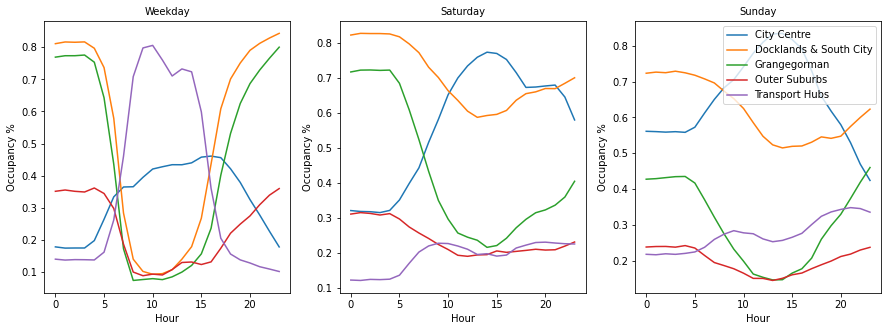

In [29]:
linechart_data = merged_with_clusters[['DAY_TYPE', 'Cluster', 'HOUR', 'OCCUPANCY_PCT']]
linechart_data['Cluster'] = np.where(linechart_data['Cluster'] == 0, 'City Centre',
                                    np.where(linechart_data['Cluster'] == 1, 'Grangegorman',
                                            np.where(linechart_data['Cluster'] == 2, 'Transport Hubs',
                                                    np.where(linechart_data['Cluster'] == 3, 'Docklands & South City', 'Outer Suburbs'))))

#Weekday
linechart_data_weekday = linechart_data[linechart_data['DAY_TYPE'] == 'Weekday']
linechart_data_weekday = linechart_data_weekday.groupby(['HOUR', 'Cluster'])['OCCUPANCY_PCT'].mean()
linechart_data_weekday  = linechart_data_weekday.reset_index()
y1 = linechart_data_weekday['OCCUPANCY_PCT'].values
x1 = linechart_data_weekday['HOUR'].values
labels1 = linechart_data_weekday['Cluster'].values
colours1 = linechart_data_weekday['Cluster'].values
df1 = pd.DataFrame(dict(x=x1, y=y1, label=labels1))
groups1 = df1.groupby('label')

#Saturday
linechart_data_saturday = linechart_data[linechart_data['DAY_TYPE'] == 'Saturday']
linechart_data_saturday = linechart_data_saturday.groupby(['HOUR', 'Cluster'])['OCCUPANCY_PCT'].mean()
linechart_data_saturday  = linechart_data_saturday.reset_index()
y2 = linechart_data_saturday['OCCUPANCY_PCT'].values
x2 = linechart_data_saturday['HOUR'].values
labels2 = linechart_data_saturday['Cluster'].values
colours2 = linechart_data_saturday['Cluster'].values
df2 = pd.DataFrame(dict(x=x2, y=y2, label=labels2))
groups2 = df2.groupby('label')

#Sunday
linechart_data_sunday = linechart_data[linechart_data['DAY_TYPE'] == 'Sunday']
linechart_data_sunday = linechart_data_sunday.groupby(['HOUR', 'Cluster'])['OCCUPANCY_PCT'].mean()
linechart_data_sunday  = linechart_data_sunday.reset_index()
y3 = linechart_data_sunday['OCCUPANCY_PCT'].values
x3 = linechart_data_sunday['HOUR'].values
labels3 = linechart_data_sunday['Cluster'].values
colours3 = linechart_data_sunday['Cluster'].values
df3 = pd.DataFrame(dict(x=x3, y=y3, label=labels3))
groups3 = df3.groupby('label')

import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for name, group in groups1:
    axs[0].plot(group.x, group.y, label=name)
    axs[0].set_title('Weekday')
    axs[0].set_xlabel('Hour')
    axs[0].set_ylabel('Occupancy %')
    #fig.suptitle('This is a somewhat long figure title', fontsize=16)

for name, group in groups2:
    axs[1].plot(group.x, group.y, label=name)
    axs[1].set_title('Saturday')
    axs[1].set_xlabel('Hour')
    axs[1].set_ylabel('Occupancy %')
    

for name, group in groups3:
    axs[2].plot(group.x, group.y, label=name)
    axs[2].set_title('Sunday')
    axs[2].set_xlabel('Hour')
    axs[2].set_ylabel('Occupancy %')
    axs[2].legend()

plt.show()

In [31]:
# Impact of Stations
join_table= merged_with_clusters.groupby(['STATION ID','NAME', 'DATE']).agg(rain=('rain', 'sum'), TOTAL_CHANGES=('BIKE_ARR_DEP_ABS', 'sum'))
join_table =join_table.reset_index()
join_table['WET/DRY DAY'] = np.where(join_table['rain'] > 3, "Wet", "Dry")
join_table = join_table.drop(['rain'], axis = 1)
join_table =join_table.reset_index()
merged_with_clusters_wetdry = pd.merge(merged_with_clusters, join_table, on = ['STATION ID', 'NAME', 'DATE'], how = 'left')

wetday_df= merged_with_clusters_wetdry.groupby(['STATION ID', 'NAME', 'WET/DRY DAY']).agg(AVG_CHANGES=('TOTAL_CHANGES', 'mean'))
wetday_df =wetday_df.reset_index()
difference_df = wetday_df.pivot(index=['NAME'], columns='WET/DRY DAY', values='AVG_CHANGES').reset_index()
difference_df['Change'] = difference_df['Dry'] - difference_df['Wet']
difference_df.sort_values(by = 'Change', ascending=False).head(30)

WET/DRY DAY,NAME,Dry,Wet,Change
87,PORTOBELLO HARBOUR,268.667020,251.299090,17.367930
101,TALBOT STREET,204.112653,189.169696,14.942957
61,KILMAINHAM GAOL,102.674665,89.138224,13.536442
96,SOUTH DOCK ROAD,183.418196,170.069310,13.348886
99,ST. STEPHEN'S GREEN EAST,135.003279,122.134989,12.868291
40,GRANTHAM STREET,178.837201,165.983982,12.853219
57,JERVIS STREET,165.056634,152.249448,12.807186
81,ORMOND QUAY UPPER,162.692758,150.021584,12.671175
82,PARKGATE STREET,119.818111,107.381632,12.436479
95,SMITHFIELD NORTH,172.240466,159.806675,12.433792


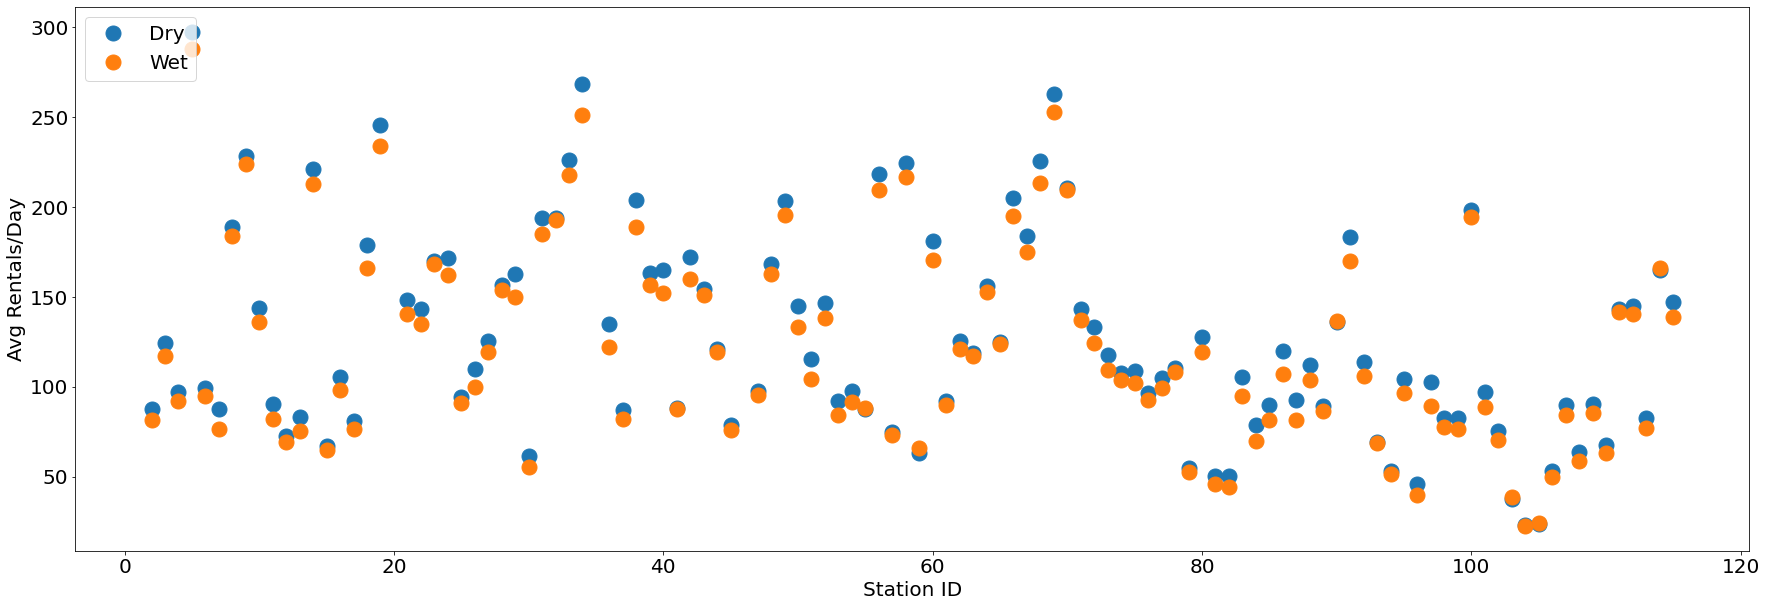

In [32]:
import pandas as pd
y = wetday_df['AVG_CHANGES'].values
x = wetday_df['STATION ID'].values
labels = wetday_df['WET/DRY DAY'].values
colours = wetday_df['WET/DRY DAY'].values
df = pd.DataFrame(dict(x=x, y=y, label=labels))
groups = df.groupby('label')

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


fig, ax = plt.subplots(figsize=(30, 10))
#ax.set_color_cycle(colors)
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.x, group.y,  marker='o',  linestyle='', ms=15, label=name)
ax.legend(numpoints=1, loc='upper left')
plt.xlabel("Station ID")
plt.ylabel("Avg Rentals/Day")
plt.show()

### ML Occupancy Percentage Classifier

In [33]:
ml_classifier_data = merged_with_clusters[merged_with_clusters['REBALANCING'] < 1] #exclude days where rebalancing took place
ml_classifier_data = ml_classifier_data[['STATION ID', 'OCCUPANCY_PCT' , 'dry', 'warm', 'DAY_NUMBER', 'HOUR', 'MONTH']]


def bin_occupancy(x):
    if x < 0.1:
        return 0
    elif x < 0.1:
        return 0.1
    elif x < 0.2:
        return 0.1
    elif x < 0.3:
        return 0.1
    elif x < 0.4:
        return 0.1
    elif x < 0.5:
        return 0.1
    elif x < 0.6:
        return 0.1
    elif x < 0.7:
        return 0.1
    elif x < 0.8:
        return 0.1
    else:
        return 0.2

ml_classifier_data["OCC_GROUP"] = ml_classifier_data['OCCUPANCY_PCT'].apply(bin_occupancy)
ml_classifier_data["OCC_GROUP"] = ml_classifier_data["OCC_GROUP"] * 10
ml_classifier_data["OCC_GROUP"] = ml_classifier_data["OCC_GROUP"].astype(int)
ml_classifier_data.dropna(inplace = True)
msk = np.random.rand(len(ml_classifier_data)) < 0.8
train = ml_classifier_data[msk]
test = ml_classifier_data[~msk]
print(len(train))
print(len(test))

X_train = train.drop(['OCCUPANCY_PCT', "OCC_GROUP"], axis = 1)
X_test = test.drop(['OCCUPANCY_PCT', "OCC_GROUP"], axis = 1)
Y_train = train[["OCC_GROUP"]] 
Y_test = test[["OCC_GROUP"]]

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

#pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
print(sklearn.metrics.classification_report(Y_test,Y_pred))

1787335
447694
Accuracy: 0.7879801828927795
              precision    recall  f1-score   support

           0       0.79      0.75      0.77    133371
           1       0.79      0.82      0.81    234832
           2       0.78      0.75      0.77     79491

    accuracy                           0.79    447694
   macro avg       0.79      0.77      0.78    447694
weighted avg       0.79      0.79      0.79    447694



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


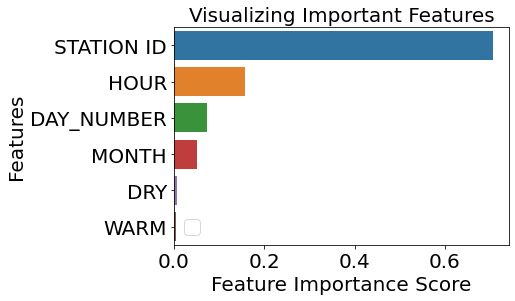

In [34]:
## show feature importances 

feature_imp = pd.Series(clf.feature_importances_,index=['STATION ID','DRY', 'WARM', 'DAY_NUMBER', 'HOUR', 'MONTH']).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()